In [7]:
#import user modules
#--- MATPLOTLIB
import matplotlib.pyplot as plt
import matplotlib
from matplotlib.markers import MarkerStyle
from matplotlib.gridspec import GridSpec
import matplotlib.colors as mcolors
import seaborn as sns
import pandas as pd

import sys
my_path = "../../Python/"
if my_path not in sys.path:
    sys.path.append(my_path)
 
for place in sys.path: 
    print(place)

from tools import *
from fit_funcs import *
from entropy import *
import costfun.costfun as cost
import utils.figures as fig_help
from RandomMatrixTheory import goe
import utils.tools as tools

import importlib as imp
def reload_modules():
    imp.reload(cost)
    imp.reload(fig_help)

import itertools
matplotlib.rcParams['mathtext.fontset'] = 'stix'
matplotlib.rcParams['font.family'] = 'STIXGeneral'
latex_engine = 'xelatex'
latex_elements = {'preamble':r'\usepackage{physics}'}

%matplotlib inline
colors_ls = (list(mcolors.TABLEAU_COLORS)[:200])
colors_ls_cyc = itertools.cycle(colors_ls)

markers_ls = ['o','s','v', 'D', '<', 'X', '^', '*', '+']
markers = itertools.cycle(markers_ls)

linestyle_ls = ['-','--',':', '-.']
linestyle = itertools.cycle(linestyle_ls)

#--- NUMERICAL LIBS
import numpy as np
import itertools
import math
import random
from cmath import nan
import h5py   


# SCIPY LIBS
import scipy.stats as statistics
from scipy.special import binom
from scipy.special import erfinv
from scipy.special import digamma
from scipy.special import polygamma
from scipy.special import lambertw
from scipy.optimize import curve_fit as fit
from scipy.signal import savgol_filter
from scipy import integrate
from scipy import fft
from scipy.interpolate import make_interp_spline as make_spline
from scipy.interpolate import splrep, splev
 
# OTHER
import warnings
warnings.filterwarnings('ignore')
from joblib import Parallel, delayed
import copy
import os
from os import sep as kPSep
from os.path import exists


scaled_disorder = 0

base_dir = "../results/"

print(base_dir[2:])

/Users/rafal.swietek/Projects/CODES/QHamSolver/QSunU1/Jupyter_Python
/Users/rafal.swietek/opt/anaconda3/lib/python39.zip
/Users/rafal.swietek/opt/anaconda3/lib/python3.9
/Users/rafal.swietek/opt/anaconda3/lib/python3.9/lib-dynload

/Users/rafal.swietek/opt/anaconda3/lib/python3.9/site-packages
/Users/rafal.swietek/opt/anaconda3/lib/python3.9/site-packages/aeosa
/Users/rafal.swietek/opt/anaconda3/lib/python3.9/site-packages/locket-0.2.1-py3.9.egg
/Users/rafal.swietek/opt/anaconda3/lib/python3.9/site-packages/IPython/extensions
/Users/rafal.swietek/.ipython
../../Python/
/results/


## FIDELITY SUSCEPTIBLITY

In [8]:
N=3
sizes = np.arange(10, 19, 2) - N
max_typ = np.ones(sizes.shape)
max_susc = np.ones(sizes.shape)

[0.6  0.62 0.64 0.66 0.68 0.7  0.72 0.74 0.76 0.78 0.8  0.82 0.84 0.86
 0.88 0.9  0.92 0.94 0.96 0.98]
7 SUSC	 0.8200000000000002 || 0.0 0.0 		TYP_SUSC	 0.68 || 10000.0 10000.0


ValueError: Error on input data

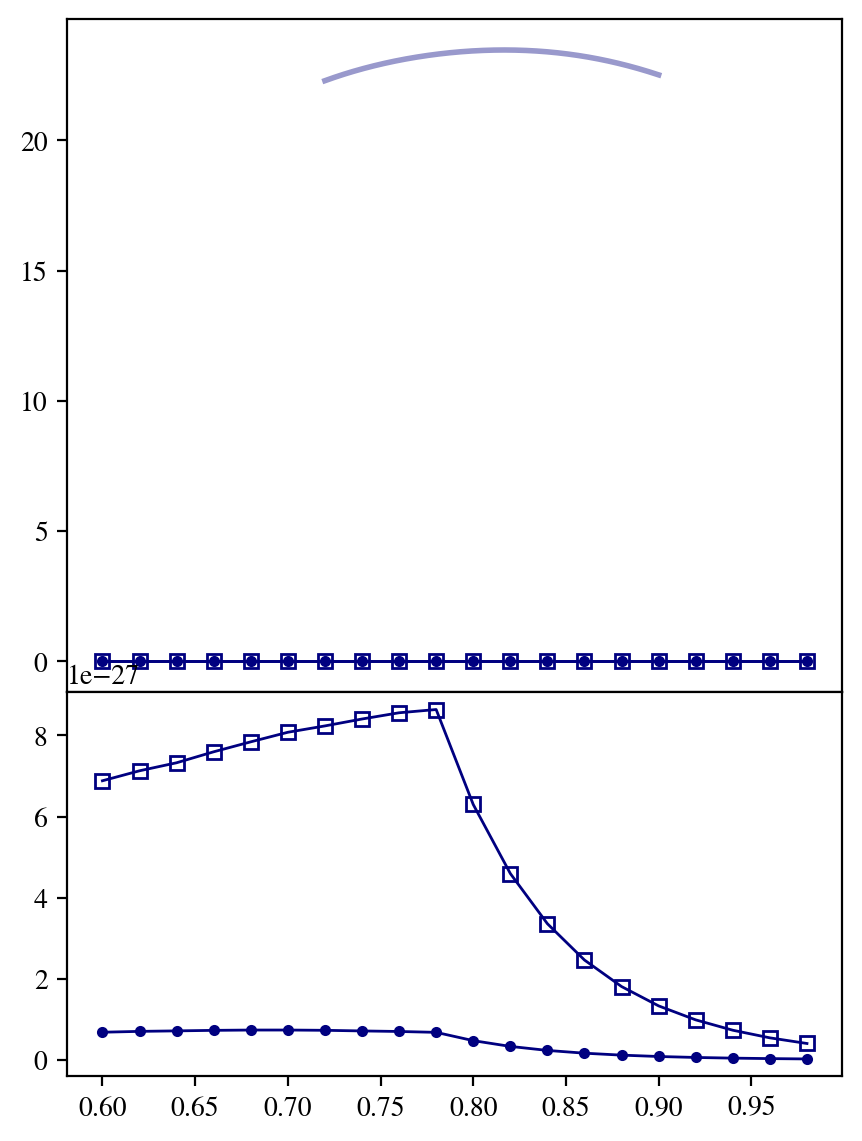

In [19]:
markers_ls2 = ['s','o', 'D', '<', 'X', '^', '*', '+']
markers2 = itertools.cycle(markers_ls2)
colors_ls_cyc = itertools.cycle(colors_ls)

L_total=15

J=1
alfa=1.0
h=1.0
w=0.5
zeta=0.2
N=3
gamma=1
ini_ave=0
L = L_total - N
scaled_disorder = 0
Sz = 0

alfa_crit = 0.78

alfa_vals = np.arange(0.6, 1., 0.02)
print(alfa_vals)

sizes = np.arange(10, 19, 2) - N
norm = matplotlib.colors.Normalize(
        vmin=min(sizes),
        vmax=max(sizes) )


# create a ScalarMappable and initialize a data structure
s_m = matplotlib.cm.ScalarMappable(cmap='jet', norm=norm)
s_m.set_array([])
fig = plt.figure(figsize=(5,7), dpi = 200)
fig.subplots_adjust(hspace=0.0)
gs = GridSpec(2, 1, height_ratios = [7, 4]) 
# gs1 = GridSpec(1,1)
# gs.update(top=0.98, bottom=0.48, hspace=0.02)
# gs1.update(top=0.4, bottom=0.02)
ax1 = fig.add_subplot(gs[0])
axis = [ax1, fig.add_subplot(gs[1])]
# fig, axis = plt.subplots( nrows=2, ncols=1, figsize=(5,9.5), dpi = 200, sharex=True)

agp_max = []
alfa_max1 = []
susc_max = []
alfa_max2 = []
for iiL, L in enumerate( sizes ):
    col = s_m.to_rgba(L)
    dim = 2**(L+N)
    
    reals    = np.zeros((alfa_vals.size)); reals.fill(np.nan)
    reals2   = np.zeros((alfa_vals.size)); reals.fill(np.nan)
    agp      = np.zeros((alfa_vals.size)); agp.fill(np.nan)
    susc     = np.zeros((alfa_vals.size)); susc.fill(np.nan)
    typ_susc = np.zeros((alfa_vals.size)); typ_susc.fill(np.nan)
    norm_av_fading = np.zeros((alfa_vals.size)); norm_av_fading.fill(np.nan)
    norm_typ_fading = np.zeros((alfa_vals.size)); norm_typ_fading.fill(np.nan)
    norm_av = np.zeros((alfa_vals.size)); norm_av.fill(np.nan)
    norm_typ = np.zeros((alfa_vals.size)); norm_typ.fill(np.nan)
    wH = np.zeros((alfa_vals.size)); wH.fill(np.nan)
    wH_anal = np.zeros((alfa_vals.size)); wH_anal.fill(np.nan)
    for ii, alfa in enumerate(alfa_vals):
        name = base_dir + 'SpectralFunctions/' + info(L=L, N=N, J=J, gamma=gamma, zeta=zeta, alfa=alfa, h=h, w=w, ext='.hdf5', Sz=Sz)
        eta = 2 / (1 - np.log(alfa) / np.log(alfa_crit))
        if exists(name):
            with h5py.File(name, "r") as file:
                R = np.array(file.get('realisations'))
                DOS = max(np.array(file.get('DOS'))) / R
                # DOS = dim * 1.0
                
                # wHx = np.array(file.get('wH'))[-2]
                # wHx_typ = np.array(file.get('wH_typ'))[-2]
                # wH[ii] = wHx
                # # wHx = 1/dim
                # wHx_typ = 1 / dim
                
                # mu = wHx#np.sqrt(L+N) / dim
                
                norm_av_fading[ii] = DOS**(2 / eta - 1) / max_susc[iiL] if alfa >= alfa_crit else DOS**(-1) / max_susc[iiL]
                norm_typ_fading[ii] = DOS**(2 / eta - 1) / max_typ[iiL] if alfa >= alfa_crit else DOS**(-1) / max_typ[iiL]
                norm_av[ii] = 1/max_susc[iiL] #DOS**(-1) * (mu)**(-2)
                norm_typ[ii] = 1/max_typ[iiL] #DOS**(-1) * (wHx_typ)**(-2)
                
                # norm_av_fading[ii] = DOS**(-2 / eta) / mu**2 if alfa >= alfa_crit else mu**(-2)
                # norm_typ_fading[ii] = DOS**(-2 / eta) / wHx_typ**2 if alfa >= alfa_crit else wHx_typ**(-2)
                # norm_av[ii] = DOS**(-1) * (mu)**(-2)
                # norm_typ[ii] = DOS**(-1) * (wHx_typ)**(-2)
                
                # DOS = max(np.array(file.get('DOS'))) / R
                # norm2[ii] = DOS**(-2 / eta) / wHx**2 if alfa >= alfa_crit else 1 / wHx**2
                
                reals[ii] = np.array(file.get('realisations'))
                agp[ii] = np.array(file.get('SUSC_R'))[1][-2]
                # susc[ii] = np.array(file.get('SUSC_R'))[-2]
                typ_susc[ii] = np.array(file.get('TYP_SUSC'))[1][-2]
        else:
            print(name)
        
    max_typ[iiL] = typ_susc[-1]
    max_susc[iiL] = agp[-1]
    axis[0].plot(alfa_vals, typ_susc * norm_typ, color=col, marker='o', markersize=3, lw=1)
    axis[0].plot(alfa_vals, agp      * norm_av * 20, color=col, marker='s', markersize=5, lw=1, markerfacecolor='None')
    axis[1].plot(alfa_vals, typ_susc * norm_typ_fading, color=col, marker='o', markersize=3, lw=1)
    axis[1].plot(alfa_vals, agp      * norm_av_fading * 20, color=col, marker='s', markersize=5, lw=1, markerfacecolor='None')
    
    print(L, "SUSC\t", alfa_vals[np.argmax(agp)], "||", min(reals2), max(reals2), "\t\tTYP_SUSC\t", alfa_vals[np.argmax(typ_susc)], "||", min(reals), max(reals))
    x = alfa_vals[~np.isnan(agp)]
    agp = agp[~np.isnan(agp)] / agp[-1] * 20
    # indices = np.where(np.logical_and(alfa_vals >= 0.6, alfa_vals < 1.85))[0]
    if agp.size > 10:
        indices = np.arange(np.argmax(agp) - 5, np.argmax(agp) + 5, 1)
        x = np.linspace(alfa_vals[indices][0], alfa_vals[indices][-1], 1000)
        f = splrep(alfa_vals[indices], agp[indices], k=5, s=10)
        agp = splev(x, f)
        axis[0].plot(x, agp, lw=2, alpha=0.4, color=col)
        idx = np.argmax(agp)
        agp_max.append(agp[idx])
        alfa_max1.append(x[idx])
    else:
        agp_max.append(np.nan)
        alfa_max1.append(np.nan)
    
    x = alfa_vals[~np.isnan(typ_susc)]
    typ_susc = typ_susc[~np.isnan(typ_susc)] / typ_susc[-1]
    if typ_susc.size > 10:
        indices = np.arange(np.argmax(typ_susc) - 5, np.argmax(typ_susc) + 5, 1)
        x = np.linspace(alfa_vals[indices][0], alfa_vals[indices][-1], 1000)
        f = splrep(alfa_vals[indices], typ_susc[indices], k=5, s=10)
        typ_susc = splev(x, f)
        idx = np.argmax(typ_susc)
        susc_max.append(typ_susc[idx])
        alfa_max2.append(x[idx])
    else:
        susc_max.append(np.nan)
        alfa_max2.append(np.nan)
  
print(max_typ)
  
axis[0].plot(alfa_max1, agp_max,  marker='v', color='black', ls='--', markersize=5)
axis[0].plot(alfa_max2, susc_max, marker='v', color='black', ls='--', markersize=5)

axis[1].plot(np.nan, np.nan, color='k', marker='o', markersize=3, lw=1, label=r"$\chi^{\rm typ}$" if L == 13 else "")
axis[1].plot(np.nan, np.nan, color='k', marker='s', markersize=4, lw=1, markerfacecolor='None', label=r"$\chi^{\rm av}_r\cdot20$" if L == 13 else "") 
    
# fig.subplots_adjust(top=0.97)
cbar_ax = axis[0].inset_axes([0.1, 1.03, 0.8, 0.03])
# fig.colorbar(im, cax=cbar_ax)
cbar = fig.colorbar(s_m, cax=cbar_ax, aspect=1, orientation = 'horizontal')
cbar.set_label(r"$L$", fontsize=16)
cbar_ax.xaxis.set_ticks_position('top')
cbar_ax.xaxis.set_label_position('top')

   
axis[0].annotate(r"(a)", fontsize=18, xy=(0.03, 0.92), xycoords='axes fraction')
axis[1].annotate(r"(b)", fontsize=18, xy=(0.03, 0.88), xycoords='axes fraction')
# axis[1].set_ylim(2e-4, 6e1)
axis[0].set_xlim(0.6, 1)
axis[1].set_xlim(0.6, 1)

# axis[1].set_ylim(2e-4, 30)

for axa in axis:
    # ax.axvline(x=1/np.sqrt(2), ls=':', c='gray')
    # axa.axvline(x=alfa_crit,    ls=':', c='gray')
    axa.axvspan(xmin = alfa_crit - 0.005, xmax = alfa_crit + 0.005, color='gray', alpha=0.5 )
    
fig_help.set_plot_elements(axis[0], ylabel=r"normalized $\chi$", xlabel=r"$\alpha$", font_size=16, set_legend=False, xscale='linear', yscale='log')
fig_help.set_plot_elements(axis[1], ylabel=r"$\chi\cdot \rho(\epsilon)^{\frac{2}{\eta}}/D^2$", xlabel=r"$\alpha$", font_size=16, set_legend=False, xscale='linear', yscale='log')
fig_help.set_legend(axis[1], fontsize=15, loc='lower right')


inset = axis[0].inset_axes([0.44, 0.02, 0.22, 0.28])

# sizes = sizes+N
for alfac in [alfa_max1, alfa_max2]:
    col = color=next(colors_ls_cyc)
    inset.scatter(1/sizes, alfac, marker=next(markers2), color=col)
    xx = 1/sizes[~np.isnan(alfac)]
    yy = np.array(alfac)[~np.isnan(alfac)]
    pars, pconv, fit_info, msg, _ = fit(lin_fit2,
                        xdata = xx[-5:],
                        ydata = yy[-5:],
                        full_output=True, maxfev=10000)
    print(*pars)
    xx = np.linspace(0, max(1/sizes), 10000)
    inset.plot( xx, lin_fit2(xx, *pars), ls='--',  color = col)

fig_help.set_plot_elements(inset, ylabel=r"$\alpha_c$", xlabel=r"$1/L$", font_size=14, set_legend=False, xscale='linear', yscale='linear')
inset.set_xlim(0, 0.17)
# inset.set_ylim(0, 0.17)

# inset.set_xticks([0.05, 0.1, 0.78, 0.8])
# axis[0].set_xticks([])

axis[0].xaxis.set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, pos: "" ))

inset.set_yticks([0.7, 0.72, 0.74, 0.76, 0.78])
# inset.set_yticklabels(["0.7", "0.72", "", "", "0.78"])
inset.set_xticks([0, 0.1, 0.15])
inset.set_xticklabels(["0", "0.1", "0.15"])
inset.xaxis.set_label_position("top")
inset.xaxis.tick_top()
inset.xaxis.set_label_coords(0.25, 1.1)
inset.yaxis.set_label_position("left")
inset.yaxis.set_label_coords(-0.22, 0.55)

# inset.axhline(y=1/np.sqrt(2), ls=':', c='gray')
# inset.axhline(y=alfa_crit,    ls='--', c='k')
inset.axhspan(ymin = alfa_crit - 0.005, ymax = alfa_crit + 0.005, color='gray', alpha=0.5 )
fig.subplots_adjust(wspace = 0.03, hspace=0.03)
# fig.savefig("plots_AGP/Fig2.pdf", bbox_inches = 'tight', pad_inches=0.02)

[0.74 0.77 0.8  0.83 0.86 0.89 0.92]


ValueError: Error on input data

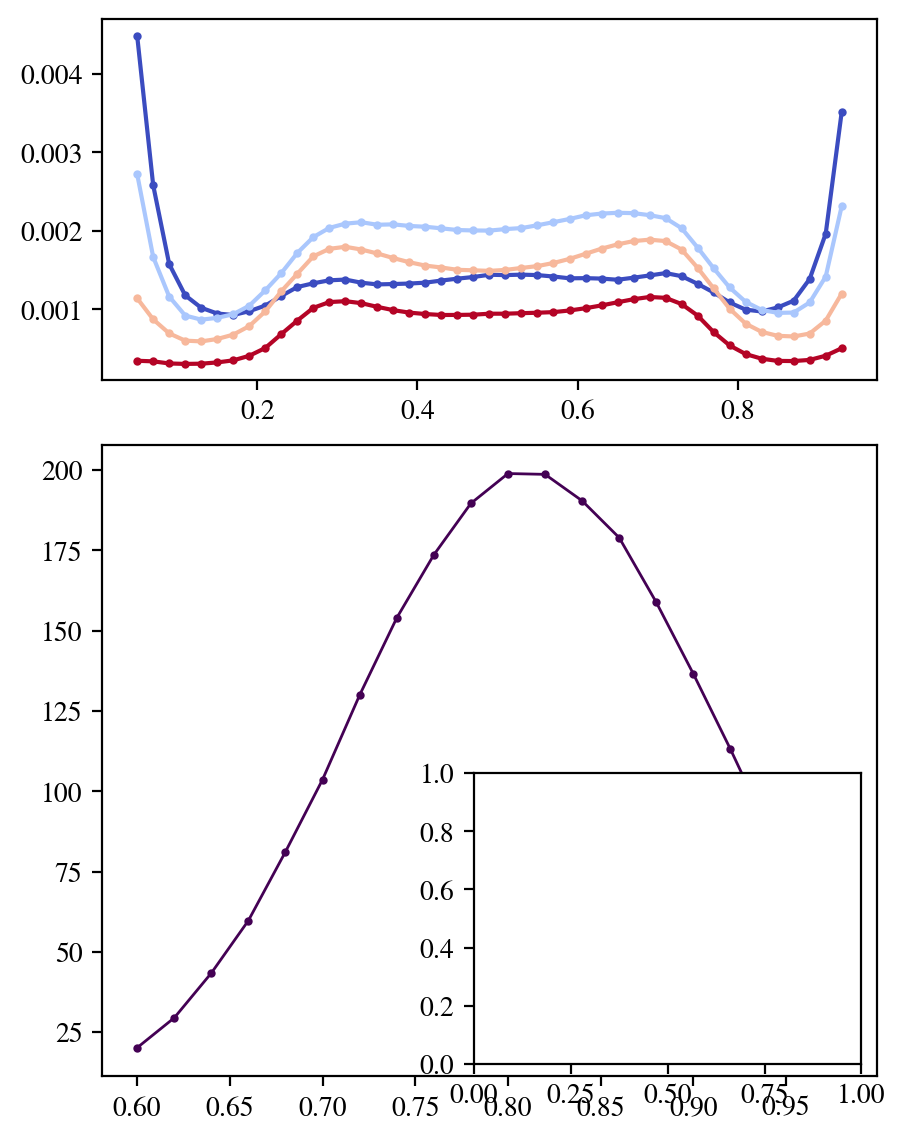

In [18]:
L_total=14

J=1
alfa=1.0
h=1.0
w=0.5
zeta=0.2
N=3
gamma=1
ini_ave=0
L = L_total - N
scaled_disorder = 0
Sz = 0

alfa_crit = 0.74

window = 3

alfa_vals = np.arange(0.6, 1, 0.02)
alfa_plot = np.round(np.arange(0.74, 0.95, 0.03), 2)
print(alfa_plot)


dim = 2**L_total
# fig, axis = plt.subplots( nrows=1, ncols=1, figsize=(5,5), dpi = 200)
fig = plt.figure(figsize=(5,7), dpi = 200)
fig.subplots_adjust(hspace=0.13, wspace=0.2)
gs = GridSpec(2, 1, height_ratios = [4, 7]) 
# gs1 = GridSpec(1,1)
# gs.update(top=0.98, bottom=0.48, hspace=0.02)
# gs1.update(top=0.4, bottom=0.02)
axis = [fig.add_subplot(gs[0]), fig.add_subplot(gs[1])]

inset = axis[1].inset_axes([0.48, 0.02, 0.5, 0.46])

depsilon = 0.05
_eps_ = np.arange(depsilon, 1.0-depsilon, 0.02)
_eps_ = _eps_[_eps_ <= 0.86]
_eps_ = _eps_[_eps_ >= 0.15]

s_m_a = matplotlib.cm.ScalarMappable(cmap='coolwarm', norm= matplotlib.colors.Normalize(vmin=min(alfa_plot), vmax=max(alfa_plot) ))
s_m = matplotlib.cm.ScalarMappable(cmap='viridis', norm= matplotlib.colors.Normalize(vmin=min(_eps_), vmax=0.5 ))
# s_m = matplotlib.cm.ScalarMappable(cmap='viridis', norm= matplotlib.colors.Normalize(vmin=0.5, vmax=max(_eps_) ))
s_m.set_array([])

alfa_c = []
alfa_c2 = []
agp_c = []
for jj in range(_eps_.size):
    eps = _eps_[jj]
    col2 = s_m.to_rgba(eps)
    # print(eps)
    agp      = np.zeros((alfa_vals.size)); agp.fill(np.nan)
    for ii, alfax in enumerate(alfa_vals):
        alfa = np.round(alfax, 2)
        col = s_m_a.to_rgba(alfa)
        eta = 2 / (1 - np.log(alfa) / np.log(alfa_crit))
        # eta = 2*((1 - alfa_crit))/ ((alfa - alfa_crit))
        
        name = base_dir + 'SpectralFunctions/' + info(L=L, N=N, J=J, gamma=gamma, zeta=zeta, alfa=alfa, h=h, w=w, ext='.hdf5', Sz=Sz)
    
        if exists(name):
            with h5py.File(name, "r") as file:
                
                E = np.array(file.get('energy_density')) #[window//2:-window//2]
                wH = np.array(file.get('wH_density'))
                wH_typ = np.array(file.get('wH_typ_density'))
                
                R = np.array(file.get('realisations'))
                DOS = np.array(file.get('DOS')) / R
                idx_05 = min(range(len(E)), key=lambda i: abs(E[i] - 0.5))
                idx2 = min(range(len(E)), key=lambda i: abs(E[i] - eps))
                
                norm = DOS
                
                count = np.array(file.get('count'))[0] / R
                _agp = np.array(file.get('susc_E_typ'))[0] / R
                
                if jj == 0 and (alfa in alfa_plot):
                    yy = _agp * DOS**(2 / eta) * wH_typ**2
                    # yy = _agp / DOS
                    # yy = yy / yy[idx_05]
                    axis[0].plot(E, yy, color=col, marker='o', markersize=2)
                # _agp = _agp / norm
                agp[ii] = _agp[idx2]# / count[idx2]
        else:
            print(name)

    wH = np.sqrt(2**(N-1) * 0.3 + J**2 / 4 * ( (alfa_vals**(2*L+2) - alfa_vals**2) / (alfa_vals**2 - 1) ) + L / 4 * (1 + (w)**2 / 3)) / (0.3413 * dim)
    
    matelem = dim ** (-1/eta)
    norm = dim#max(agp2)#matelem**2 / wH**2
    if eps <= 0.5:
        axis[1].plot(alfa_vals, agp, color=col2, marker='o', markersize=2, lw=1)
    
    idx = np.argmax(agp)
    
    # x = alfa_vals
    indices = np.arange(np.argmax(agp) - 15, min(np.argmax(agp) + 10, agp.size-1), 1)
    x = np.linspace(alfa_vals[indices][0], alfa_vals[indices][-1], 1000)
    f = splrep(alfa_vals[indices], agp[indices], k=3, s=5)
    agp = splev(x, f)
    idx = np.argmax(agp)
    alfa_c.append(x[idx])
    if eps <= 0.5:
        alfa_c2.append(x[idx])
        agp_c.append(agp[idx])
    
    # if eps <= 0.5:
    #     axis.plot(x, agp, color=col2, alpha=0.5)
    
    # if eps <= 0.5:
    #     axis.plot(x, agp, color=col2, lw=4, alpha=0.35)
print(_eps_)
print(alfa_c)
inset.plot(_eps_, alfa_c,  marker='s', color='red', ls='--', markersize=5, lw=0, markerfacecolor='None', label=r"$L=%d$"%(L))

a = 1.05
b = 0.45
alfac = alfa_crit#1 / np.sqrt(2)
x = np.linspace(0.13, 0.87, 1000)
inset.plot(x, alfac * np.exp(a**2 * (x - 0.5)**2 / 4 / b*2), color='k', ls='--', lw=2, label=r"$L=\infty$")
axis[1].scatter(alfa_c2, agp_c, marker='s', color='red', facecolor='None')

axis[0].xaxis.set_label_coords(.9, -0.02)
axis[1].xaxis.set_label_coords(.4, -0.02)

axis[1].axvline(x=alfa_crit, ls='-', c='gray')
# axis.axvline(x=alfa_crit,    ls=':', c='k')

ylab = r"$\tilde{\chi}^{\rm typ}(\epsilon)$"# if projected else r"$||\mathcal{A}_\lambda(\epsilon)||^2$"
fig_help.set_plot_elements(axis[0], ylabel=ylab, xlabel=r"$\epsilon$", font_size=16, set_legend=False, xscale='linear', yscale='linear')
ylab = r"$\chi^{\rm typ}(\epsilon)$"
fig_help.set_plot_elements(axis[1], ylabel=ylab, xlabel=r"$\alpha$", font_size=16, set_legend=False, xscale='linear', yscale='log')
axis[1].set_ylim(1e-6, None)

axis[0].xaxis.set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, pos: "%g"%(np.round(x, order_of_magnitude(x))) ))
axis[0].yaxis.set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, pos: "%g"%(np.round(x, order_of_magnitude(x))) ))

cbar_ax = axis[0].inset_axes([1., 0.0, 0.03, 1])
# fig.colorbar(im, cax=cbar_ax)
cbar = fig.colorbar(s_m_a, cax=cbar_ax, aspect=1, orientation = 'vertical')
cbar.set_label(r"$\alpha$", fontsize=16)
cbar_ax.yaxis.set_ticks_position('right')
cbar_ax.yaxis.set_label_position('right')
# divider = make_axes_locatable(axis[1])
# cax = divider.new_vertical(size = '3%', pad = 0.05)
# fig.add_axes(cax)
# cbar = fig.colorbar(s_m, cax = cax, orientation = 'horizontal')
# cax.xaxis.set_ticks_position('top')
# cax.xaxis.set_label_position('top')
# cbar.set_label(r"$\epsilon$", fontsize=16)

cbar_ax = axis[1].inset_axes([1., 0.0, 0.03, 1])
# fig.colorbar(im, cax=cbar_ax)
cbar = fig.colorbar(s_m, cax=cbar_ax, aspect=1, orientation = 'vertical')
cbar.set_label(r"$\epsilon$", fontsize=16)
cbar_ax.yaxis.set_ticks_position('right')
cbar_ax.yaxis.set_label_position('right')

inset.xaxis.set_label_position("top")
inset.xaxis.set_label_coords(.45, 1.2)
inset.xaxis.tick_top()

inset.yaxis.set_label_position("left")
inset.yaxis.set_label_coords(-0.06, 0.55)
inset.yaxis.tick_left()
fig_help.set_plot_elements(inset, ylabel=r"$\alpha_c^*$", xlabel=r"$\epsilon$", font_size=14, set_legend=False, xscale='linear', yscale='linear')
fig_help.set_legend(inset, fontsize=12, loc='upper center')

# inset.set_yticks([0.71, 0.73, 0.74])
# inset.set_xticks([0.2, 0.3, 0.4, 0.5])
inset.set_ylabel(r"$\alpha_c$", rotation=0, fontsize=16)

inset.axhline(y=alfa_crit,    ls='-', color='gray')
# inset.axhline(y=1/np.sqrt(2), ls='-', color='gray')
inset.set_ylim(0.71, 0.95)
# inset.annotate(r"$\tilde{\alpha}_c$", color='gray', fontsize=12, xy=(0.3, 0.7075), xycoords='data', backgroundcolor="w")
inset.annotate(r"${\alpha}_c$", color='gray', fontsize=12, xy=(0.2, 0.74), xycoords='data', backgroundcolor="w")

axis[0].annotate(r"(a)", fontsize=18, xy=(0.03, 0.88), xycoords='axes fraction')
axis[1].annotate(r"(b)", fontsize=18, xy=(0.03, 0.92), xycoords='axes fraction')

# fig.savefig("plots_AGP/Fig3.pdf", bbox_inches = 'tight', pad_inches=0.02)

## SPECTRAL FUNCTIONS